In [90]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


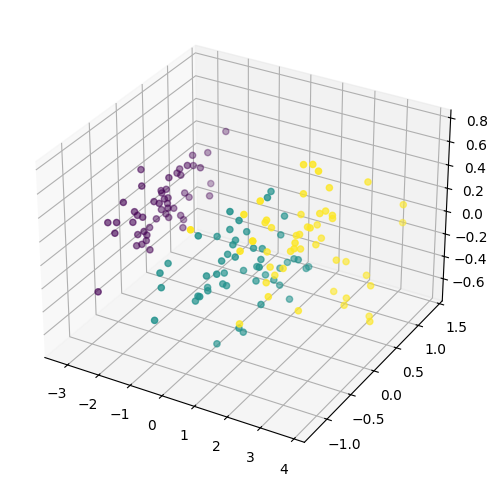

In [91]:
iris=datasets.load_iris()
X=iris.data
y=iris.target
pca=PCA()
principalComponents=pca.fit_transform(X)
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(principalComponents[:,0],principalComponents[:,1],principalComponents[:,2],c=y,cmap='viridis')
plt.show()

In [92]:
housing=pd.read_csv('housing.csv',sep=';')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [93]:
housing2=housing[['longitude','latitude','median_house_value']]
housing2.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [94]:
housing2.isnull().sum()
#housing2.fillna(lambda x: x.mean())
housing.dropna(inplace=True)

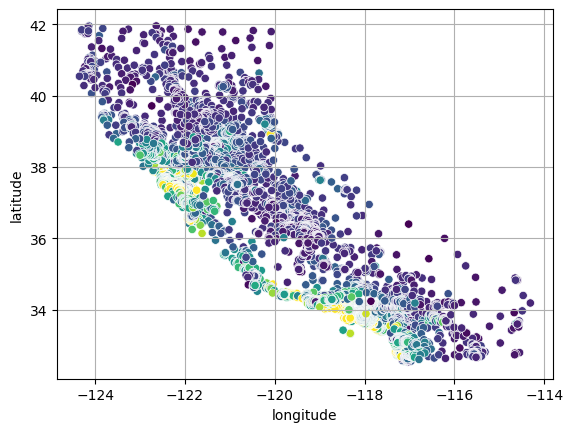

In [95]:
sns.scatterplot(x=housing2['longitude'],y=housing2['latitude'],c=housing2['median_house_value'])
plt.grid(True)
plt.show()

In [96]:
st_scaler=StandardScaler()
minmax_scaler=MinMaxScaler()
housing2_scaled=st_scaler.fit_transform(housing2)

In [97]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(housing2_scaled)


KMeans(n_clusters=3)

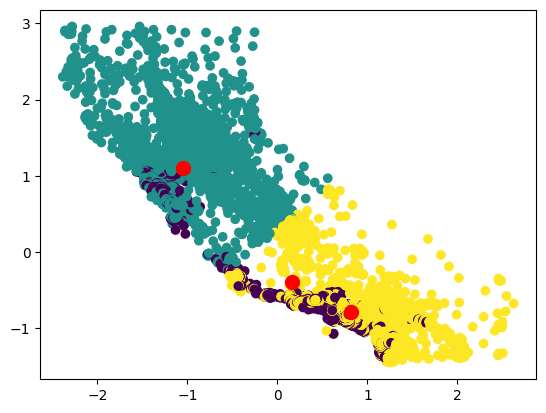

In [98]:
plt.scatter(housing2_scaled[:,0],housing2_scaled[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=100)
plt.show()

In [99]:
y_kmeans=kmeans.predict(housing2_scaled)
silhouette=silhouette_score(housing2_scaled,y_kmeans)
print(silhouette)

0.5291943043959512


In [100]:
kmeans_scores=[]
num_Ofclusters=[2,3,4,5,6,7,8]
for cluster_number in range(2,9):
    kmeans=KMeans(n_clusters=cluster_number)
    kmeans.fit(housing2_scaled)
    kmeans_scores.append(silhouette_score(housing2_scaled,kmeans.labels_))


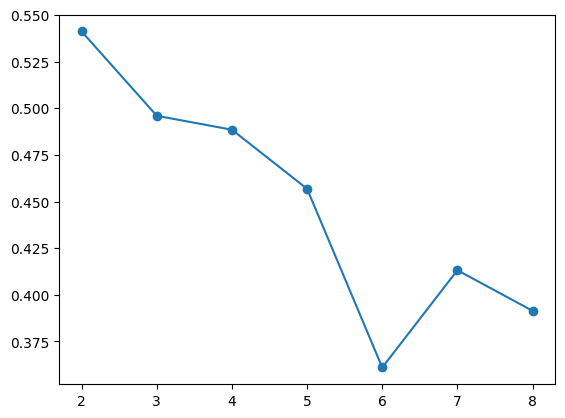

In [101]:
plt.plot(num_Ofclusters,kmeans_scores,marker='o')
plt.show()

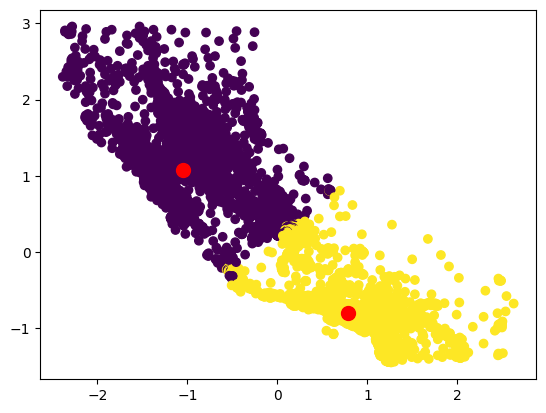

In [103]:
best_K=num_Ofclusters[np.argmax(kmeans_scores)]
kmeans=KMeans(n_clusters=best_K)
kmeans.fit(housing2_scaled)
plt.scatter(housing2_scaled[:,0],housing2_scaled[:,1],c=kmeans.labels_,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=100)
plt.show()